**Author:** Cainã Max Couto da Silva  
**LinkedIn:** [cmcouto-silva](https://www.linkedin.com/in/cmcouto-silva/)

This notebook was designed to support [this article on Medium](https://medium.com/@cmcouto.silva/the-categorical-encoder-you-choose-might-impact-the-model-performance-3dcc2727abb9).

If you enjoy it, please consider upvoting it on Medium and/or upvoting my skills on LinkedIn 😊

# Settings

In [1]:
%pip install scikit-learn==1.4

In [2]:
import sklearn
print(sklearn.__version__)

1.4.0


In [3]:
# Data wrangling
import pandas as pd

# To import the adult census data
from sklearn import datasets

# To encode categorical features
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder

# To use estimators (models)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# To wrap up together preprocessor and model into a ML pipeline
from sklearn.pipeline import make_pipeline

# To evaluate model using cross-validation
from sklearn.model_selection import cross_validate

# Set config to output a pandas dataframe given a pandas dataframe input
from sklearn import set_config
set_config(transform_output='pandas')

# Data visualization
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

## Parameters

In [4]:
TARGET_METRICS = ['accuracy', 'balanced_accuracy', 'recall', 'precision', 'f1', 'roc_auc']
COLOR_PALETTE = ['#009e73', '#d55e00', '#0072b2'] # color-blind friendly

## Functions

In [5]:
def plot_tree_custom(clf: DecisionTreeClassifier, filename: str=None):
    """Plot a fittted decision tree"""
    # Get dot data
    dot_data = export_graphviz(
        decision_tree=clf,
        out_file=None,
        feature_names=clf.feature_names_in_,
        class_names=[str(c) for c in clf.classes_],
        filled=True
    )
    # Draw graph
    graph = graphviz.Source(dot_data, format="png")
    if filename:
        graph.render(filename, view=False)
    return graph

## Plot settings

In [6]:
# See all possibilites at https://matplotlib.org/stable/users/explain/customizing.html
sns.set_theme(
    context='talk', style='ticks', palette=COLOR_PALETTE, font_scale=1,
    rc={
      'figure.figsize': (15,6), 'font.weight': 'regular',
      'axes.titleweight': 'bold', 'axes.labelpad': 15, 'axes.titlepad': 25,
      'ytick.labelsize': 'small', 'xtick.labelsize': 'small',
      'axes.grid':True, 'grid.alpha':.4
    }
)

## Load datasets

### Dataset 1

In [7]:
# Load adult census data
df_adult_census = datasets.fetch_openml(name='adult', version=1, parser='auto')['frame']

# Encode target variable using a rule-based approach (resulting into a binary variable)
df_adult_census['class_bin'] = df_adult_census['class'].eq('>50K').astype(int)

# List only categorical variables & target
CATEGORICAL_FEATURES = [
  'workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'
]

TARGET = 'class_bin'

# Select input features, filling missing categorical values with "Unknown"
dataset_adult_census = (
    df_adult_census[CATEGORICAL_FEATURES].astype(object).fillna('Unknown'),
    df_adult_census[TARGET]
)

# Show dataset
pd.concat(dataset_adult_census, axis=1)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class_bin
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,0
48838,Unknown,HS-grad,Widowed,Unknown,Other-relative,Black,Male,United-States,0
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,0
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,0


### Dataset 2

In [8]:
# Read csv data from URL
df_churn = pd.read_csv('https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/telco_churn.csv')

# List only categorical features & target
CATEGORICAL_FEATURES = [
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Paperless Billing',
    'Payment Method'
]

TARGET = 'Churn Value'

# Select only categorical features + target as a tuple
dataset_churn = df_churn[CATEGORICAL_FEATURES], df_churn[TARGET]

# Show dataset
pd.concat(dataset_churn, axis=1)

,Senior Citizen,Partner,Dependents,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Value
0,No,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
4,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
7028,No,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0
7029,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
7030,No,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


# Modeling

## Train & Evaluate

In [9]:
# List datasets
datasets = {
    'adult_census': dataset_adult_census,
    'churn': dataset_churn
}

# List models
models = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(random_state=42)
]

# List preprocessors (one-hot, ordinal and target encoders)
preprocessors = [
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    TargetEncoder(random_state=42)
]

In [10]:
# Train & evaluate model for each combination of dataset / encoder / model
cv_results = []

for dataset, (X,y) in datasets.items():
    for model in models:
        for preprocessor in preprocessors:
            # Get model and preprocessor names
            model_name = model.__class__.__name__
            preprocessor_name = preprocessor.__class__.__name__
            # Print current iteration
            print(f'{dataset} - {model_name} - {preprocessor_name}')
            # Create pipeline
            model_pipeline = make_pipeline(preprocessor, model)
            # Compute performance metrics using cross-validation
            cv_result = cross_validate(model_pipeline, X, y, scoring=TARGET_METRICS)
            df_cv_result = pd.DataFrame(cv_result)
            df_cv_result[['dataset','model','preprocessor']] = (dataset, model_name, preprocessor_name)
            cv_results.append(df_cv_result)

adult_census - LogisticRegression - OneHotEncoder
adult_census - LogisticRegression - OrdinalEncoder
adult_census - LogisticRegression - TargetEncoder
adult_census - RandomForestClassifier - OneHotEncoder
adult_census - RandomForestClassifier - OrdinalEncoder
adult_census - RandomForestClassifier - TargetEncoder
churn - LogisticRegression - OneHotEncoder
churn - LogisticRegression - OrdinalEncoder
churn - LogisticRegression - TargetEncoder
churn - RandomForestClassifier - OneHotEncoder
churn - RandomForestClassifier - OrdinalEncoder
churn - RandomForestClassifier - TargetEncoder


In [11]:
# Concatenate results & reorder the ID columns
df_cv_results = (
    pd.concat(cv_results)
    .set_index(['dataset','model','preprocessor'])
    .reset_index()
)

# Remove preffix "test_" from the column names
df_cv_results.columns = df_cv_results.columns.str.replace('test_', '')

## Explore results

In [12]:
# Aggregate the results with the mean and standard deviation,
# then show results
(
    df_cv_results
    .groupby(['dataset','model', 'preprocessor'])
    .agg(lambda x: f'{x.mean():.2f}±{x.std():.2f}')
)

fit_time score_time  \
dataset      model                  preprocessor                           
adult_census LogisticRegression     OneHotEncoder   1.28±0.45  0.19±0.05   
                                    OrdinalEncoder  1.26±0.32  0.27±0.15   
                                    TargetEncoder   0.48±0.06  0.24±0.03   
             RandomForestClassifier OneHotEncoder   8.01±3.36  0.56±0.09   
                                    OrdinalEncoder  2.50±0.43  0.43±0.01   
                                    TargetEncoder   3.47±0.29  0.40±0.05   
churn        LogisticRegression     OneHotEncoder   0.06±0.01  0.05±0.00   
                                    OrdinalEncoder  0.06±0.01  0.05±0.01   
                                    TargetEncoder   0.07±0.00  0.05±0.00   
             RandomForestClassifier OneHotEncoder   0.77±0.18  0.11±0.02   
                                    OrdinalEncoder  0.50±0.03  0.08±0.00   
                                    TargetEncoder   0.67±0.01  0.08±0.00   

                                                     accuracy  \
dataset      model                  preprocessor                
adult_census LogisticRegression     OneHotEncoder   0.83±0.00   
                                    OrdinalEncoder  0.76±0.00   
                                    TargetEncoder   0.83±0.00   
             RandomForestClassifier OneHotEncoder   0.83±0.00   
                                    OrdinalEncoder  0.82±0.00   
                                    TargetEncoder   0.83±0.00   
churn        LogisticRegression     OneHotEncoder   0.79±0.01   
                                    OrdinalEncoder  0.79±0.01   
                                    TargetEncoder   0.79±0.01   
             RandomForestClassifier OneHotEncoder   0.76±0.01   
                                    OrdinalEncoder  0.76±0.01   
                                    TargetEncoder   0.78±0.01   

                                                   balanced_accuracy  \
dataset      model                  preprocessor                       
adult_census LogisticRegression     OneHotEncoder          0.73±0.00   
                                    OrdinalEncoder         0.50±0.00   
                                    TargetEncoder          0.71±0.00   
             RandomForestClassifier OneHotEncoder          0.73±0.00   
                                    OrdinalEncoder         0.73±0.00   
                                    TargetEncoder          0.73±0.01   
churn        LogisticRegression     OneHotEncoder          0.72±0.02   
                                    OrdinalEncoder         0.70±0.01   
                                    TargetEncoder          0.72±0.02   
             RandomForestClassifier OneHotEncoder          0.67±0.02   
                                    OrdinalEncoder         0.67±0.02   
                                    TargetEncoder          0.69±0.02   

                                                       recall  precision  \
dataset      model                  preprocessor                           
adult_census LogisticRegression     OneHotEncoder   0.54±0.01  0.70±0.01   
                                    OrdinalEncoder  0.02±0.00  0.37±0.05   
                                    TargetEncoder   0.50±0.00  0.70±0.01   
             RandomForestClassifier OneHotEncoder   0.54±0.01  0.67±0.01   
                                    OrdinalEncoder  0.54±0.01  0.66±0.01   
                                    TargetEncoder   0.54±0.01  0.69±0.01   
churn        LogisticRegression     OneHotEncoder   0.56±0.03  0.62±0.03   
                                    OrdinalEncoder  0.52±0.03  0.62±0.02   
                                    TargetEncoder   0.55±0.04  0.63±0.02   
             RandomForestClassifier OneHotEncoder   0.48±0.04  0.56±0.01   
                                    OrdinalEncoder  0.48±0.04  0.57±0.01   
                                    TargetEncoder   0.50±0.04  0.61±0.02   

   

In [13]:
# Reshape the cv results for data visualization
df_cv_results_long = (
    df_cv_results
    .drop(columns=['fit_time','score_time'])
    .melt(id_vars=['dataset','model','preprocessor'], var_name='metric')
    .set_index('dataset')
)

display(df_cv_results_long)

,model,preprocessor,metric,value
dataset,,,,
adult_census,LogisticRegression,OneHotEncoder,accuracy,0.829563
adult_census,LogisticRegression,OneHotEncoder,accuracy,0.829051
adult_census,LogisticRegression,OneHotEncoder,accuracy,0.838657
adult_census,LogisticRegression,OneHotEncoder,accuracy,0.832412
adult_census,LogisticRegression,OneHotEncoder,accuracy,0.835483
...,...,...,...,...
churn,RandomForestClassifier,TargetEncoder,roc_auc,0.814218
churn,RandomForestClassifier,TargetEncoder,roc_auc,0.841133
churn,RandomForestClassifier,TargetEncoder,roc_auc,0.824178


In [14]:
# Filter reshaped cv results by dataset
df_adult_census_metrics = df_cv_results_long.loc['adult_census']
df_churn_metrics = df_cv_results_long.loc['churn']

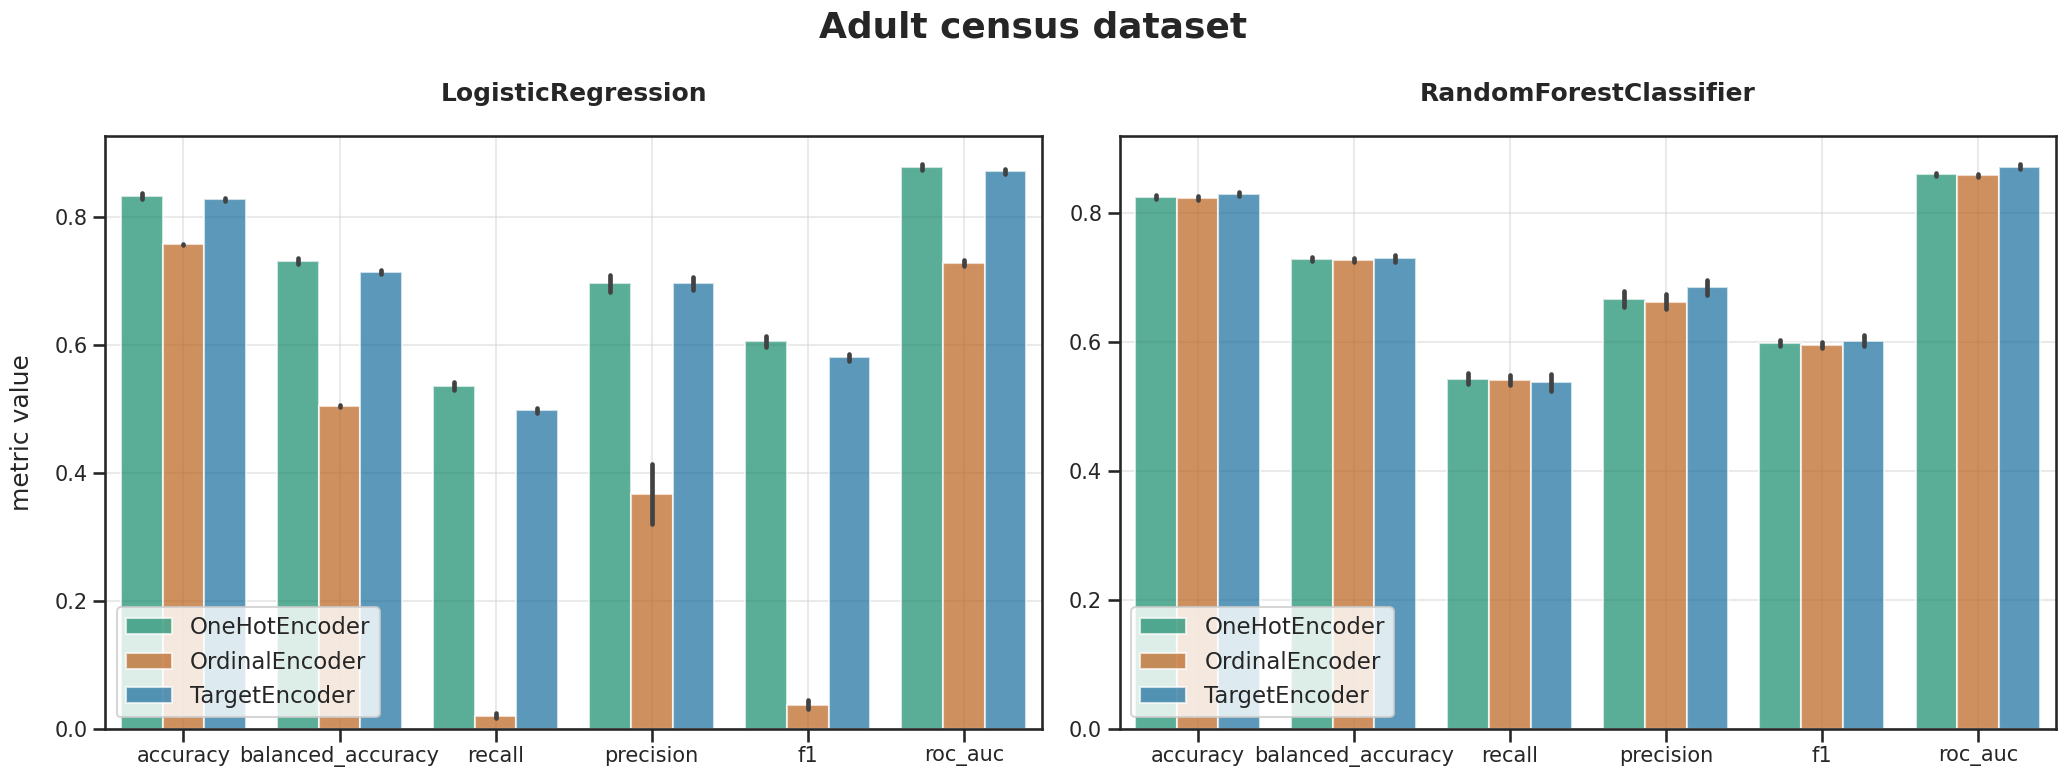

In [15]:
# Plot for the adult census dataset
fig,axes = plt.subplots(ncols=len(models), figsize=(21,8))

for i,model in enumerate(models):
    model_name = model.__class__.__name__
    df_subset = df_adult_census_metrics.query('model==@model_name')
    sns.barplot(data=df_subset, x='metric', y='value', hue='preprocessor', estimator='mean', errorbar='sd', alpha=.7, ax=axes[i], palette=COLOR_PALETTE)
    axes[i].legend(loc='lower left')
    axes[i].set_title(model_name)
    axes[i].grid(True)
    if i==0:
        axes[i].set(xlabel=None, ylabel='metric value')
    else:
        axes[i].set(xlabel=None, ylabel=None)

plt.suptitle('Adult census dataset', weight='bold', size='x-large')
plt.tight_layout()
plt.show()

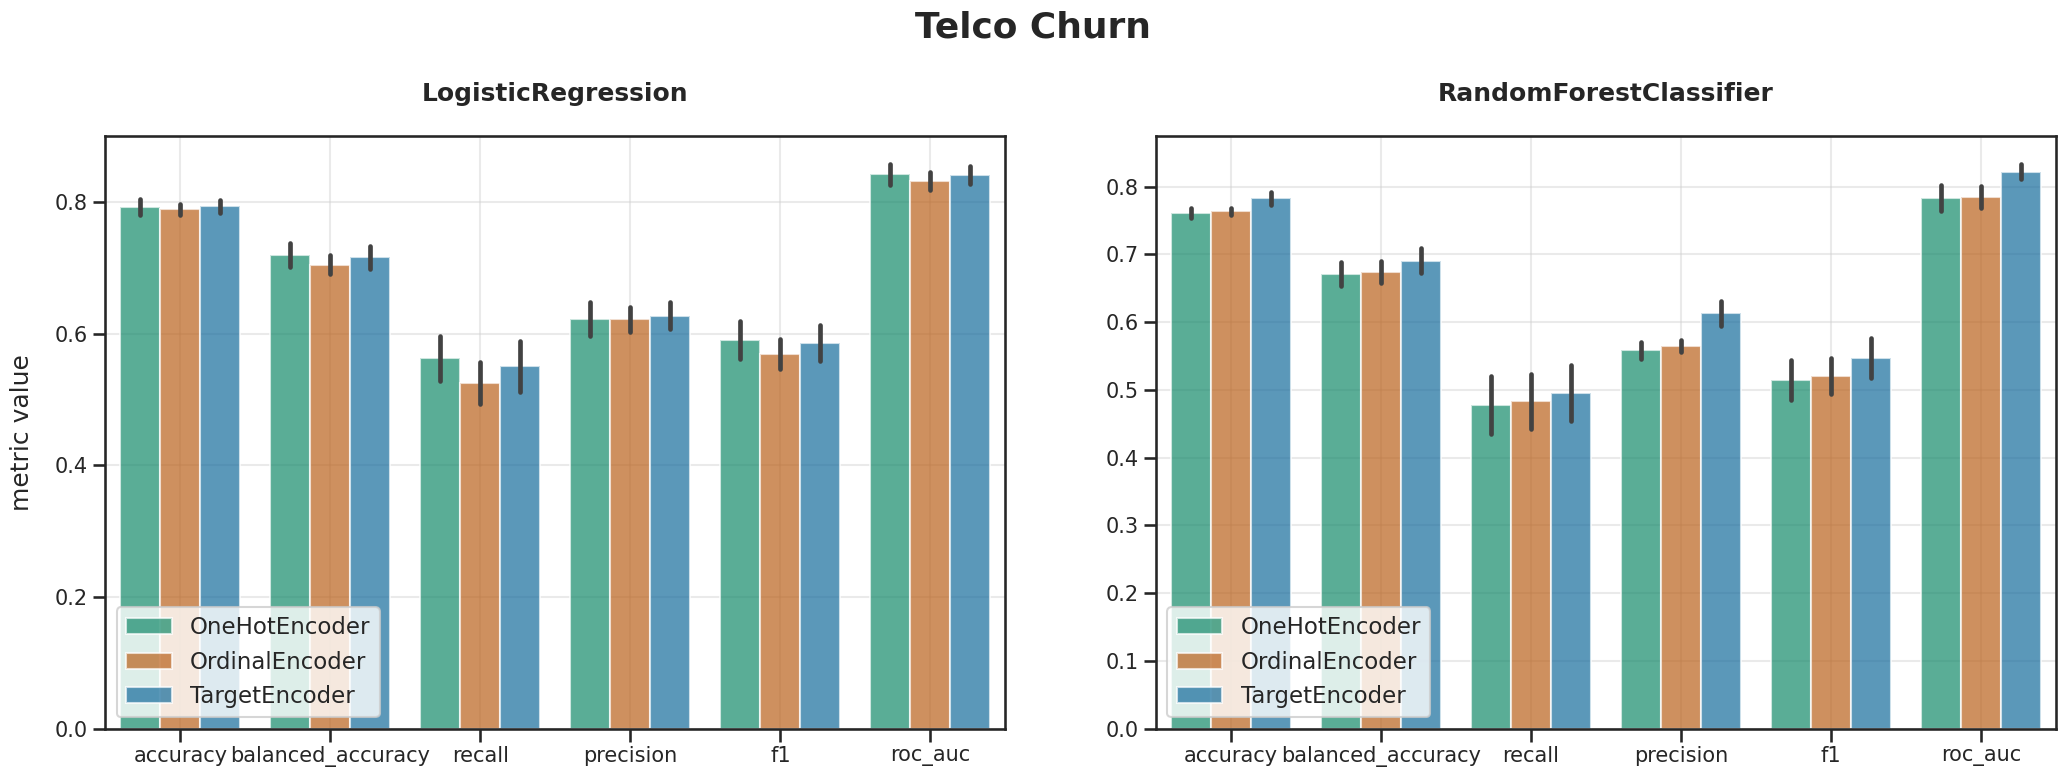

In [16]:
# Plot for the churn dataset
fig,axes = plt.subplots(ncols=len(models), figsize=(21,8))

for i,model in enumerate(models):
    model_name = model.__class__.__name__
    df_subset = df_churn_metrics.query('model==@model_name')
    sns.barplot(data=df_subset, x='metric', y='value', hue='preprocessor', estimator='mean', errorbar='sd', alpha=.7, ax=axes[i], palette=COLOR_PALETTE)
    axes[i].legend(loc='lower left')
    axes[i].set_title(model_name)
    axes[i].grid(True)
    if i==0:
        axes[i].set(xlabel=None, ylabel='metric value')
    else:
        axes[i].set(xlabel=None, ylabel=None)

plt.suptitle('Telco Churn', weight='bold', size='x-large')
plt.tight_layout(w_pad=4)
plt.show()

## Exploring the results

Checking the cardinality from each dataset:

In [17]:
dataset_adult_census[0].apply('nunique')

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [18]:
dataset_adult_census[0].apply('nunique')

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

Identifying the most important feature for the Random Forest (RF) model:

In [19]:
rf_pipeline = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    RandomForestClassifier(random_state=42, class_weight='balanced')
)

rf_pipeline.fit(*dataset_adult_census);

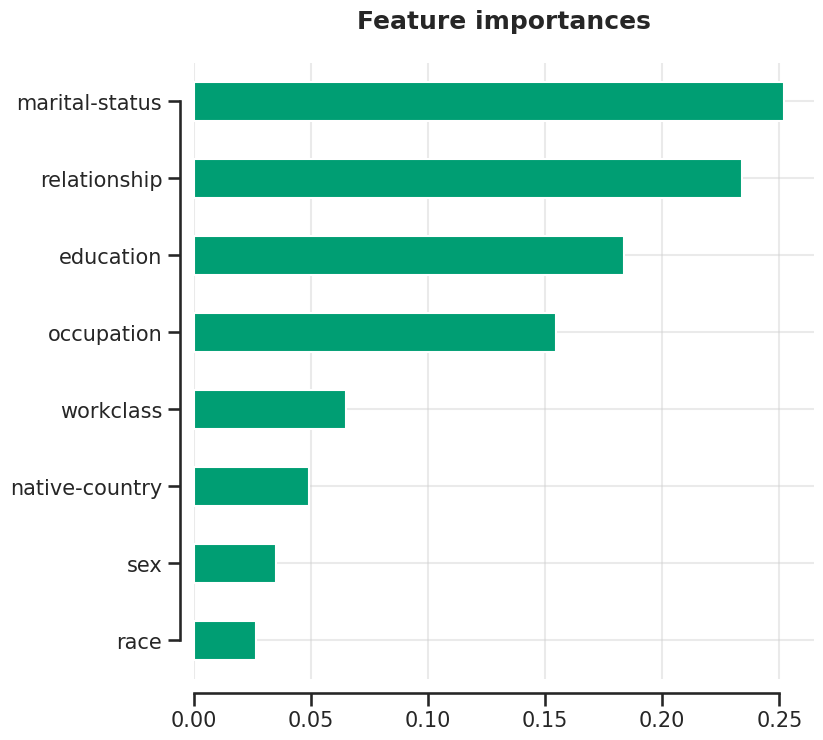

In [20]:
rf_feat_importances = (
    pd.Series(rf_pipeline[-1].feature_importances_, index=rf_pipeline[-1].feature_names_in_)
    .sort_values(ascending=True)
)

rf_feat_importances.plot.barh(figsize=(8,8))
plt.title('Feature importances', weight='bold')
sns.despine(trim=True, offset=10)
plt.show()

In [21]:
most_important_feature = rf_feat_importances.idxmax()
print(most_important_feature)

marital-status


Create a simple decision tree (DT) model, for each encoder, using only this feature:

In [22]:
dt_pipeline_onehotencoder = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    DecisionTreeClassifier(random_state=42, class_weight='balanced')
)

dt_pipeline_ordinalencoder = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    DecisionTreeClassifier(random_state=42, class_weight='balanced')
)

X = df_adult_census[[most_important_feature]]
y = df_adult_census['class_bin']

dt_pipeline_onehotencoder.fit(X,y)
dt_pipeline_ordinalencoder.fit(X, y)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

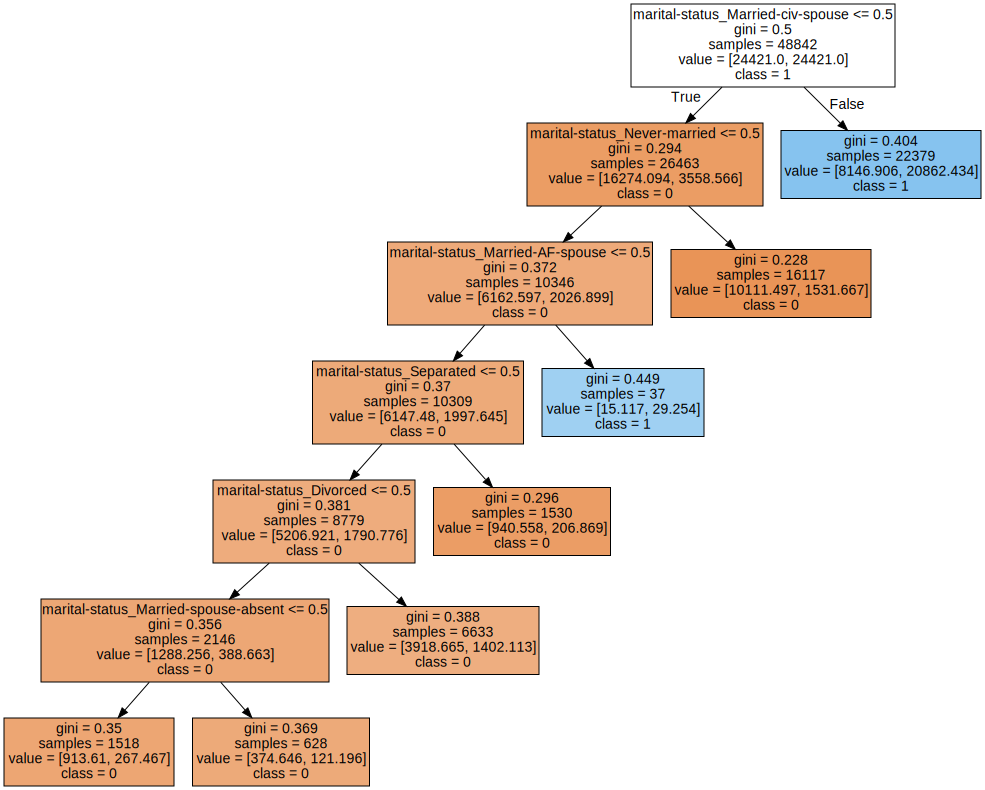

In [23]:
# Plot tree for one-hot encoding
plot_tree_custom(dt_pipeline_onehotencoder[-1], filename='onehot')

In [24]:
# Show ordinal encoding mapper for each category
ordinal_mapper = pd.DataFrame(dt_pipeline_ordinalencoder[0].categories_)
ordinal_mapper.rename({0:'category'}).rename_axis('encoded_value', axis=1)

encoded_value,0,1,2,3,4,5,6
category,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed


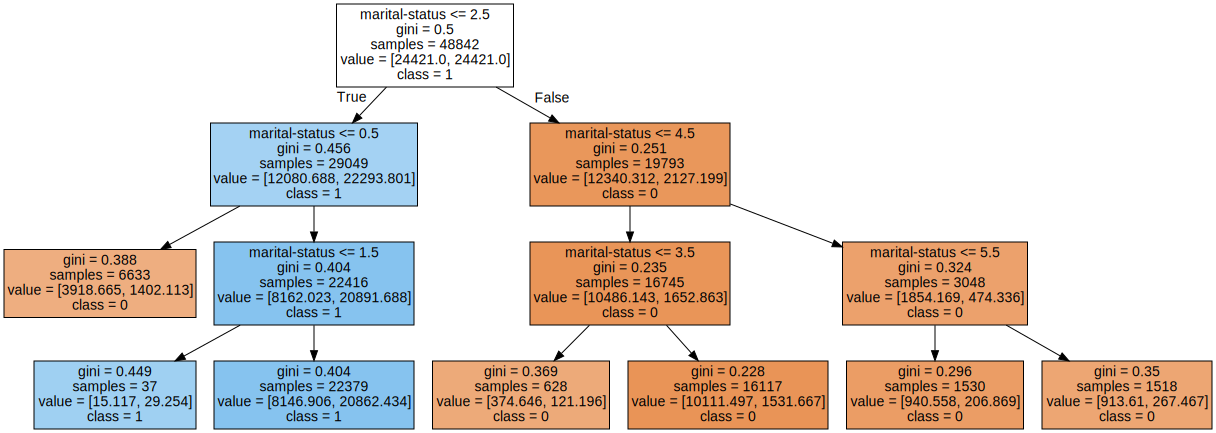

In [25]:
# Plot tree for ordinal encoding
plot_tree_custom(dt_pipeline_ordinalencoder[-1], filename='ordinal')